Se importan las librerías que se usarán en este proyecto

In [26]:
import pandas as pd
import requests
import json
from urllib.parse import urlencode
import matplotlib.pyplot as plt
from datetime import date

A continuación se va a construir una URL para hacer una solicitud a una API web, para este caso SECOP II - Contratos Electrónicos.

In [27]:
base_url = '***************************.com'

Se indica el usuario y contraseña del acceso.

In [28]:

username = '*******@ejemplo.com'
password = '*******'

In [29]:
limit = 1000000  
params = urlencode({'$limit': limit})
url = f'{base_url}?{params}'

Se hace una solicitud HTTP GET a la URL construida anteriormente utilizando la biblioteca requests. Luego, la informaciòn que está en formato JSON se debe transformar en un objeto de python, luego en una dataframe con pandas. Si la solicitud no fue exitosa, se solicita que indique que hay un error en la solicitud a la API. 

In [30]:
response = requests.get(url, auth=(username, password))

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
else:
    print('Error en la solicitud a la API:', response.status_code)

Verificamos las dimensiones de la base de datos que acabamos de crear.

In [33]:
df.shape

(131062, 72)

Ahora revisamos las columnas que componen la base de datos.

In [34]:
df.columns

Index(['nombre_entidad', 'nit_entidad', 'departamento', 'ciudad',
       'localizaci_n', 'orden', 'sector', 'rama', 'entidad_centralizada',
       'proceso_de_compra', 'id_contrato', 'referencia_del_contrato',
       'estado_contrato', 'codigo_de_categoria_principal',
       'descripcion_del_proceso', 'tipo_de_contrato',
       'modalidad_de_contratacion', 'justificacion_modalidad_de',
       'fecha_de_firma', 'fecha_de_inicio_del_contrato',
       'fecha_de_fin_del_contrato', 'condiciones_de_entrega',
       'tipodocproveedor', 'documento_proveedor', 'proveedor_adjudicado',
       'es_grupo', 'es_pyme', 'habilita_pago_adelantado', 'liquidaci_n',
       'obligaci_n_ambiental', 'obligaciones_postconsumo', 'reversion',
       'origen_de_los_recursos', 'destino_gasto', 'valor_del_contrato',
       'valor_de_pago_adelantado', 'valor_facturado',
       'valor_pendiente_de_pago', 'valor_pagado', 'valor_amortizado',
       'valor_pendiente_de', 'valor_pendiente_de_ejecucion', 'estado_bpin',
 

Se puede evidenciar que los nombres de las columnas para esta base de datos vienen con una parametrización, la fuente de datos de la que se está usando en este ejercicio nos muestra los Nombres de cada campo, estos nombres se encuentran en el archivo adjunto llamado 'Nombres columnas', vamos a realizar los respectivos reemplazos creando un diccionario a continuación.

In [35]:
reemplazos_columnas = {
    'nombre_entidad': 'Nombre Entidad',
    'nit_entidad': 'Nit Entidad',
    'departamento': 'Departamento',
    'ciudad': 'Ciudad',
    'localizaci_n': 'Localización',
    'orden': 'Orden',
    'sector': 'Sector',
    'rama': 'Rama',
    'entidad_centralizada': 'Entidad Centralizada',
    'proceso_de_compra': 'Proceso de Compra',
    'id_contrato': 'ID Contrato',
    'referencia_del_contrato': 'Referencia del Contrato',
    'estado_contrato': 'Estado Contrato',
    'codigo_de_categoria_principal': 'Codigo de Categoria Principal',
    'descripcion_del_proceso': 'Descripcion del Proceso',
    'tipo_de_contrato': 'Tipo de Contrato',
    'modalidad_de_contratacion': 'Modalidad de Contratacion',
    'justificacion_modalidad_de': 'Justificacion Modalidad de Contratacion',
    'fecha_de_firma': 'Fecha de Firma',
    'fecha_de_inicio_del_contrato': 'Fecha de Inicio del Contrato',
    'fecha_de_fin_del_contrato': 'Fecha de Fin del Contrato',
    'fecha_de_inicio_de_ejecucion': 'Fecha de Inicio de Ejecucion',
    'fecha_de_fin_de_ejecucion': 'Fecha de Fin de Ejecucion',
    'condiciones_de_entrega': 'Condiciones de Entrega',
    'tipodocproveedor': 'TipoDocProveedor',
    'documento_proveedor': 'Documento Proveedor',
    'proveedor_adjudicado': 'Proveedor Adjudicado',
    'es_grupo': 'Es Grupo',
    'es_pyme': 'Es Pyme',
    'habilita_pago_adelantado': 'Habilita Pago Adelantado',
    'liquidaci_n': 'Liquidación',
    'obligaci_n_ambiental': 'Obligación Ambiental',
    'obligaciones_postconsumo': 'Obligaciones Postconsumo',
    'reversion': 'Reversion',
    'origen_de_los_recursos': 'Origen de los Recursos',
    'destino_gasto': 'Destino Gasto',
    'valor_del_contrato': 'Valor del Contrato',
    'valor_de_pago_adelantado': 'Valor de pago adelantado',
    'valor_facturado': 'Valor Facturado',
    'valor_pendiente_de_pago': 'Valor Pendiente de Pago',
    'valor_pagado': 'Valor Pagado',
    'valor_amortizado': 'Valor Amortizado',
    'valor_pendiente_de': 'Valor Pendiente de Amortizacion',
    'valor_pendiente_de_ejecucion': 'Valor Pendiente de Ejecucion',
    'estado_bpin': 'Estado BPIN',
    'c_digo_bpin': 'Código BPIN',
    'anno_bpin': 'Anno BPIN',
    'saldo_cdp': 'Saldo CDP',
    'saldo_vigencia': 'Saldo Vigencia',
    'espostconflicto': 'EsPostConflicto',
    'dias_adicionados': 'Dias adicionados',
    'puntos_del_acuerdo': 'Puntos del Acuerdo',
    'pilares_del_acuerdo': 'Pilares del Acuerdo',
    'urlproceso': 'URLProceso',
    'nombre_representante_legal': 'Nombre Representante Legal',
    'nacionalidad_representante_legal': 'Nacionalidad Representante Legal',
    'domicilio_representante_legal': 'Domicilio Representante Legal',
    'tipo_de_identificaci_n_representante_legal': 'Tipo de Identificación Representante Legal',
    'identificaci_n_representante_legal': 'Identificación Representante Legal',
    'g_nero_representante_legal': 'Género Representante Legal',
    'presupuesto_general_de_la_nacion_pgn': 'Presupuesto General de la Nacion – PGN',
    'sistema_general_de_participaciones': 'Sistema General de Participaciones',
    'sistema_general_de_regal_as': 'Sistema General de Regalías',
    'recursos_propios_alcald_as_gobernaciones_y_resguardos_ind_genas_': 'Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)',
    'recursos_de_credito': 'Recursos de Credito',
    'recursos_propios': 'Recursos Propios',
    'ultima_actualizacion': 'Ultima Actualizacion',
    'codigo_entidad': 'Codigo Entidad',
    'codigo_proveedor': 'Codigo Proveedor',
    'fecha_inicio_liquidacion': 'Fecha Inicio Liquidacion',
    'fecha_fin_liquidacion': 'Fecha Fin Liquidacion',
    'objeto_del_contrato': 'Objeto del Contrato'
}

df.rename(columns=reemplazos_columnas, inplace=True)

Se comprueban los cambios realizados.

In [36]:
df.columns

Index(['Nombre Entidad', 'Nit Entidad', 'Departamento', 'Ciudad',
       'Localización', 'Orden', 'Sector', 'Rama', 'Entidad Centralizada',
       'Proceso de Compra', 'ID Contrato', 'Referencia del Contrato',
       'Estado Contrato', 'Codigo de Categoria Principal',
       'Descripcion del Proceso', 'Tipo de Contrato',
       'Modalidad de Contratacion', 'Justificacion Modalidad de Contratacion',
       'Fecha de Firma', 'Fecha de Inicio del Contrato',
       'Fecha de Fin del Contrato', 'Condiciones de Entrega',
       'TipoDocProveedor', 'Documento Proveedor', 'Proveedor Adjudicado',
       'Es Grupo', 'Es Pyme', 'Habilita Pago Adelantado', 'Liquidación',
       'Obligación Ambiental', 'Obligaciones Postconsumo', 'Reversion',
       'Origen de los Recursos', 'Destino Gasto', 'Valor del Contrato',
       'Valor de pago adelantado', 'Valor Facturado',
       'Valor Pendiente de Pago', 'Valor Pagado', 'Valor Amortizado',
       'Valor Pendiente de Amortizacion', 'Valor Pendiente de Ej

Adicionalmente, para facilitar la manipulaciòn de los datos, es necesario que los tìtulos de las columnas no tengan caracteres especiales y que queden mayusculas.

In [37]:
cols=list(df.columns)
cols=[x.upper().strip() for x in cols]
df.columns=cols

df.columns

Index(['NOMBRE ENTIDAD', 'NIT ENTIDAD', 'DEPARTAMENTO', 'CIUDAD',
       'LOCALIZACIÓN', 'ORDEN', 'SECTOR', 'RAMA', 'ENTIDAD CENTRALIZADA',
       'PROCESO DE COMPRA', 'ID CONTRATO', 'REFERENCIA DEL CONTRATO',
       'ESTADO CONTRATO', 'CODIGO DE CATEGORIA PRINCIPAL',
       'DESCRIPCION DEL PROCESO', 'TIPO DE CONTRATO',
       'MODALIDAD DE CONTRATACION', 'JUSTIFICACION MODALIDAD DE CONTRATACION',
       'FECHA DE FIRMA', 'FECHA DE INICIO DEL CONTRATO',
       'FECHA DE FIN DEL CONTRATO', 'CONDICIONES DE ENTREGA',
       'TIPODOCPROVEEDOR', 'DOCUMENTO PROVEEDOR', 'PROVEEDOR ADJUDICADO',
       'ES GRUPO', 'ES PYME', 'HABILITA PAGO ADELANTADO', 'LIQUIDACIÓN',
       'OBLIGACIÓN AMBIENTAL', 'OBLIGACIONES POSTCONSUMO', 'REVERSION',
       'ORIGEN DE LOS RECURSOS', 'DESTINO GASTO', 'VALOR DEL CONTRATO',
       'VALOR DE PAGO ADELANTADO', 'VALOR FACTURADO',
       'VALOR PENDIENTE DE PAGO', 'VALOR PAGADO', 'VALOR AMORTIZADO',
       'VALOR PENDIENTE DE AMORTIZACION', 'VALOR PENDIENTE DE EJ

Ya se pueden evidenciar los cambios en los títulos de las columnas.

In [38]:
df.head(5)

,NOMBRE ENTIDAD,NIT ENTIDAD,DEPARTAMENTO,CIUDAD,LOCALIZACIÓN,ORDEN,SECTOR,RAMA,ENTIDAD CENTRALIZADA,PROCESO DE COMPRA,...,RECURSOS DE CREDITO,RECURSOS PROPIOS,ULTIMA ACTUALIZACION,CODIGO ENTIDAD,CODIGO PROVEEDOR,OBJETO DEL CONTRATO,FECHA INICIO LIQUIDACION,FECHA FIN LIQUIDACION,FECHA DE INICIO DE EJECUCION,FECHA DE FIN DE EJECUCION
0,ICBF REGIONAL SANTANDER,8999992391,Santander,Bucaramanga,"Colombia, Santander , Bucaramanga",Nacional,Salud y Protección Social,Ejecutivo,Centralizada,CO1.BDOS.5359678,...,0,0,2024-04-22T00:00:00.000,704192574,702423252,Prestar los servicios de educación inicial en ...,NaN,NaN,NaN,NaN
1,ICBF REGIONAL SANTANDER,8999992391,Santander,Bucaramanga,"Colombia, Santander , Bucaramanga",Nacional,Salud y Protección Social,Ejecutivo,Centralizada,CO1.BDOS.5359678,...,0,0,2024-04-22T00:00:00.000,704192574,702423252,Prestar los servicios de educación inicial en ...,NaN,NaN,NaN,NaN
2,ICBF REGIONAL SANTANDER,8999992391,Santander,Bucaramanga,"Colombia, Santander , Bucaramanga",Nacional,Salud y Protección Social,Ejecutivo,Centralizada,CO1.BDOS.5359788,...,0,0,2024-03-27T00:00:00.000,704192574,709204515,Prestar los servicios para la atención a la pr...,NaN,NaN,NaN,NaN
3,MINISTERIO DE IGUALDAD Y EQUIDAD,901733502,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Servicio Público,Ejecutivo,Centralizada,CO1.BDOS.5359523,...,0,0,NaN,723231049,700569072,EL CEDENTE cede totalmente a partir del 1 de e...,NaN,NaN,NaN,NaN
4,ICBF REGIONAL SANTANDER,8999992391,Santander,Bucaramanga,"Colombia, Santander , Bucaramanga",Nacional,Salud y Protección Social,Ejecutivo,Centralizada,CO1.BDOS.5359745,...,0,0,2024-03-27T00:00:00.000,704192574,709312482,Prestar los servicios para la atención a la pr...,NaN,NaN,NaN,NaN


Ahora, para mejorar la eficiencia del procesamiento de los datos, se van a seleccionar las columnas que realmente nos interesan para el presente análisis.

In [39]:
df_columnas=['NOMBRE ENTIDAD', 'NIT ENTIDAD', 'DEPARTAMENTO', 'CIUDAD',
       'LOCALIZACIÓN', 'ORDEN', 'SECTOR', 'RAMA', 'ENTIDAD CENTRALIZADA',
       'PROCESO DE COMPRA', 'ID CONTRATO', 'REFERENCIA DEL CONTRATO',
       'ESTADO CONTRATO', 'CODIGO DE CATEGORIA PRINCIPAL',
       'DESCRIPCION DEL PROCESO', 'TIPO DE CONTRATO',
       'MODALIDAD DE CONTRATACION', 'JUSTIFICACION MODALIDAD DE CONTRATACION',
       'FECHA DE FIRMA',
       'TIPODOCPROVEEDOR', 'DOCUMENTO PROVEEDOR', 'PROVEEDOR ADJUDICADO',
       'ES GRUPO', 'ES PYME', 'VALOR DEL CONTRATO','URLPROCESO']

df = df[df_columnas]

Se debe verificar y si la base de datos tiene contratos duplicados y eliminarlos si existen. Inicialmente se crea un identificador único, ya que es probable que una entidad estatal identifique un mismo número de contrato que otra.

In [49]:
df['NUMERO DE CONTRATO UNICO'] = df['NOMBRE ENTIDAD'] + df['REFERENCIA DEL CONTRATO']

C:\Windows\Temp\ipykernel_2260\2509605523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NUMERO DE CONTRATO UNICO'] = df['NOMBRE ENTIDAD'] + df['REFERENCIA DEL CONTRATO']


In [50]:
print(f"Tamaño del set antes de eliminar los ID DEL CONTRATO Repetidos: {df.shape} ")
df.drop_duplicates(subset='NUMERO DE CONTRATO UNICO', inplace=True)
print(f"Tamaño del set después de eliminar los ID DEL CONTRATO Repetidos: {df.shape}")

df.head()

Tamaño del set antes de eliminar los ID DEL CONTRATO Repetidos: (130938, 27) 
Tamaño del set después de eliminar los ID DEL CONTRATO Repetidos: (120699, 27)


C:\Windows\Temp\ipykernel_2260\1089515854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset='NUMERO DE CONTRATO UNICO', inplace=True)


,NOMBRE ENTIDAD,NIT ENTIDAD,DEPARTAMENTO,CIUDAD,LOCALIZACIÓN,ORDEN,SECTOR,RAMA,ENTIDAD CENTRALIZADA,PROCESO DE COMPRA,...,JUSTIFICACION MODALIDAD DE CONTRATACION,FECHA DE FIRMA,TIPODOCPROVEEDOR,DOCUMENTO PROVEEDOR,PROVEEDOR ADJUDICADO,ES GRUPO,ES PYME,VALOR DEL CONTRATO,URLPROCESO,NUMERO DE CONTRATO UNICO
0,ICBF REGIONAL SANTANDER,8999992391,Santander,Bucaramanga,"Colombia, Santander , Bucaramanga",Nacional,Salud y Protección Social,Ejecutivo,Centralizada,CO1.BDOS.5359678,...,Regla aplicable,2024-01-01,No Definido,804011576,FUNDACION COLOMBO ALEMANA VOLVER A SONREIR,No,No,32512632,{'url': 'https://community.secop.gov.co/Public...,ICBF REGIONAL SANTANDER68003762023
2,ICBF REGIONAL SANTANDER,8999992391,Santander,Bucaramanga,"Colombia, Santander , Bucaramanga",Nacional,Salud y Protección Social,Ejecutivo,Centralizada,CO1.BDOS.5359788,...,Regla aplicable,2024-01-01,No Definido,800079278,APHB MIRAFLORES II,No,Si,107914567,{'url': 'https://community.secop.gov.co/Public...,ICBF REGIONAL SANTANDER68004382023
3,MINISTERIO DE IGUALDAD Y EQUIDAD,901733502,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Servicio Público,Ejecutivo,Centralizada,CO1.BDOS.5359523,...,Contratos o convenios Interadministrativos (va...,2024-01-01,No Definido,800141397,DILOF,No,No,0,{'url': 'https://community.secop.gov.co/Public...,MINISTERIO DE IGUALDAD Y EQUIDADconvenio ínter...
4,ICBF REGIONAL SANTANDER,8999992391,Santander,Bucaramanga,"Colombia, Santander , Bucaramanga",Nacional,Salud y Protección Social,Ejecutivo,Centralizada,CO1.BDOS.5359745,...,Regla aplicable,2024-01-01,No Definido,804001455,APHB MANUELA BELTRAN,No,No,113281864,{'url': 'https://community.secop.gov.co/Public...,ICBF REGIONAL SANTANDER68004372023
7,HOSPITAL DEPARTAMENTAL PSIQUIATRICO UNIVERSITA...,890304155,Valle del Cauca,Cali,"Colombia, Valle del Cauca , Cali",Territorial,Salud y Protección Social,Ejecutivo,Centralizada,CO1.BDOS.5351945,...,Regla aplicable,2024-01-02,No Definido,800087565,Synlab Colombia S.A.S,No,No,82840000,{'url': 'https://community.secop.gov.co/Public...,HOSPITAL DEPARTAMENTAL PSIQUIATRICO UNIVERSITA...


Verificaremos los contratos que sirven para el análisis.

In [52]:
df['ESTADO CONTRATO'].unique()

#Hacer este paso de arriba siempre, no se sabe si hay algun dato que sirva
#['En ejecución', 'Modificado', 'cedido', 'terminado','Cerrado','Activo','Prorrogado','Suspendido']

array(['Modificado', 'En ejecución', 'Activo', 'terminado', 'cedido',
       'Cerrado', 'Suspendido'], dtype=object)

Dejaremos unicamente los estados de contrato que se consideran como activos dentro del SECOP.

In [54]:
#Eliminar los estados de los contratos que no se consideran

print(f"Tamaño del set antes de eliminar los estados: {df.shape} ")
df_final = df[df['ESTADO CONTRATO'].isin(['En ejecución', 'Modificado', 'cedido', 'terminado','Cerrado','Activo','Prorrogado','Suspendido'])]
print(f"Tamaño del set después de eliminar los estados: {df_final.shape}")


Tamaño del set antes de eliminar los estados: (120699, 27) 
Tamaño del set después de eliminar los estados: (120699, 27)


Vamos a conocer el tipo de datos que contiene cada columna de la base de datos. 

In [40]:
tipos_de_datos = df.dtypes

tipos_de_datos

NOMBRE ENTIDAD                             object
NIT ENTIDAD                                object
DEPARTAMENTO                               object
CIUDAD                                     object
LOCALIZACIÓN                               object
ORDEN                                      object
SECTOR                                     object
RAMA                                       object
ENTIDAD CENTRALIZADA                       object
PROCESO DE COMPRA                          object
ID CONTRATO                                object
REFERENCIA DEL CONTRATO                    object
ESTADO CONTRATO                            object
CODIGO DE CATEGORIA PRINCIPAL              object
DESCRIPCION DEL PROCESO                    object
TIPO DE CONTRATO                           object
MODALIDAD DE CONTRATACION                  object
JUSTIFICACION MODALIDAD DE CONTRATACION    object
FECHA DE FIRMA                             object
TIPODOCPROVEEDOR                           object


Cuando se almacenan datos de tipo string, el tipo de datos correspondiente se llama "object". Esto es simplemente una convención de pandas. Ahora, debemos cambiar los formatos necesarios para fechas y valores de los contratos. Se va cambiar ahora la fecha de firma de los contratos, de modo que sean todas con formato de fecha-hora y el valor de contrato será de tipo float

In [41]:
print(f'Formato de fecha de creación inicial: {df['FECHA DE FIRMA'].dtype}')
df['FECHA DE FIRMA']=pd.to_datetime(df['FECHA DE FIRMA'])
print(f'Formato de fecha de creación después del cambio de formato: {df['FECHA DE FIRMA'].dtype}')

Formato de fecha de creación inicial: object
Formato de fecha de creación después del cambio de formato: datetime64[ns]


C:\Windows\Temp\ipykernel_2260\817866160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FECHA DE FIRMA']=pd.to_datetime(df['FECHA DE FIRMA'])


In [42]:
tipos_de_datos = df.dtypes

tipos_de_datos

NOMBRE ENTIDAD                                     object
NIT ENTIDAD                                        object
DEPARTAMENTO                                       object
CIUDAD                                             object
LOCALIZACIÓN                                       object
ORDEN                                              object
SECTOR                                             object
RAMA                                               object
ENTIDAD CENTRALIZADA                               object
PROCESO DE COMPRA                                  object
ID CONTRATO                                        object
REFERENCIA DEL CONTRATO                            object
ESTADO CONTRATO                                    object
CODIGO DE CATEGORIA PRINCIPAL                      object
DESCRIPCION DEL PROCESO                            object
TIPO DE CONTRATO                                   object
MODALIDAD DE CONTRATACION                          object
JUSTIFICACION 

Ahora el valor del contrato a tipo entero

In [43]:
df['VALOR DEL CONTRATO']=pd.to_numeric(df['VALOR DEL CONTRATO'])

C:\Windows\Temp\ipykernel_2260\2962206377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VALOR DEL CONTRATO']=pd.to_numeric(df['VALOR DEL CONTRATO'])


In [44]:
tipos_de_datos = df.dtypes

tipos_de_datos

NOMBRE ENTIDAD                                     object
NIT ENTIDAD                                        object
DEPARTAMENTO                                       object
CIUDAD                                             object
LOCALIZACIÓN                                       object
ORDEN                                              object
SECTOR                                             object
RAMA                                               object
ENTIDAD CENTRALIZADA                               object
PROCESO DE COMPRA                                  object
ID CONTRATO                                        object
REFERENCIA DEL CONTRATO                            object
ESTADO CONTRATO                                    object
CODIGO DE CATEGORIA PRINCIPAL                      object
DESCRIPCION DEL PROCESO                            object
TIPO DE CONTRATO                                   object
MODALIDAD DE CONTRATACION                          object
JUSTIFICACION 

Ahora, se quiere conocer inicialmente, si la base de datos realmente nos está mostrando información de proveedores registrados en Armenia, Quindío, por lo cual se hace una agrupación, indicando el depatamento y municipio de acuerdo con el NIT de la empresa.

In [46]:
ubicacion_agrupados = pd.DataFrame(df.groupby(['DEPARTAMENTO', 'CIUDAD'])['REFERENCIA DEL CONTRATO'].count()).sort_values('REFERENCIA DEL CONTRATO',ascending=False).assign(Porcentaje_de_Participacion=lambda x: (x['REFERENCIA DEL CONTRATO'] / x['REFERENCIA DEL CONTRATO'].sum()) * 100)

ubicacion_agrupados

,,REFERENCIA DEL CONTRATO,Porcentaje_de_Participacion
DEPARTAMENTO,CIUDAD,,
Distrito Capital de Bogotá,Bogotá,89212,68.068548
Valle del Cauca,Cali,25597,19.530451
Atlántico,Barranquilla,8739,6.667837
Santander,Bucaramanga,7390,5.638553
Valle del Cauca,Calima,123,0.093849
Norte de Santander,San Calixto,1,0.000763


Se puede evidenciar un error en esta base de datos, hay municipios que no corresponden con las capitales que se quieren analizar, se deben retirar de la base de datos.

In [48]:
print(f'Tamaño del set antes de eliminar los contratos de la Calima y San Calixto: {df.shape} ')
df = df[(df['CIUDAD'] != 'Calima') & (df['CIUDAD'] != 'San Calixto')]
print(f'Tamaño del set después de eliminar los contratos de Calima y San Calixto: {df.shape}')

Tamaño del set antes de eliminar los contratos de la Calima y San Calixto: (131062, 26) 
Tamaño del set después de eliminar los contratos de Calima y San Calixto: (130938, 26)


Ahora verificaremos nuevamente la participación de la cantidad de contratos en las ciudades y departamentos.

In [55]:
ubicacion_agrupados = pd.DataFrame(df.groupby(['DEPARTAMENTO', 'CIUDAD'])['REFERENCIA DEL CONTRATO'].count()).sort_values('REFERENCIA DEL CONTRATO',ascending=False).assign(Porcentaje_de_Participacion=lambda x: (x['REFERENCIA DEL CONTRATO'] / x['REFERENCIA DEL CONTRATO'].sum()) * 100)

ubicacion_agrupados

,,REFERENCIA DEL CONTRATO,Porcentaje_de_Participacion
DEPARTAMENTO,CIUDAD,,
Distrito Capital de Bogotá,Bogotá,82614,68.446300
Valle del Cauca,Cali,22805,18.894108
Atlántico,Barranquilla,8462,7.010829
Santander,Bucaramanga,6818,5.648763


Realizaremos el gráfico que incorporaremos en power bi más adelante, este gráfico mostrará el valor total contratado por ciudad.

In [56]:
ubicacion_agrupados = pd.DataFrame(df.groupby(['DEPARTAMENTO', 'CIUDAD'])['VALOR DEL CONTRATO'].count()).sort_values('VALOR DEL CONTRATO',ascending=False).assign(Porcentaje_de_Participacion=lambda x: (x['VALOR DEL CONTRATO'] / x['VALOR DEL CONTRATO'].sum()) * 100)

ubicacion_agrupados

,,VALOR DEL CONTRATO,Porcentaje_de_Participacion
DEPARTAMENTO,CIUDAD,,
Distrito Capital de Bogotá,Bogotá,82614,68.446300
Valle del Cauca,Cali,22805,18.894108
Atlántico,Barranquilla,8462,7.010829
Santander,Bucaramanga,6818,5.648763


iNCORPORAR GRÁFICO EN PYTHON

Se agrupan los tipos de empresa que se consideren para agrupar, por ejemplo las fundaciones.

In [ ]:
reemplazos_tipo_empresa = {'Fundação': 'Fundaciones'                        
}
df['Tipo Empresa'].replace(reemplazos_tipo_empresa, inplace=True)

C:\Windows\Temp\ipykernel_21792\1581507725.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  directorio['Tipo Empresa'].replace(reemplazos_tipo_empresa, inplace=True)


Verificamos la distribución.

In [ ]:
tipo_empresa_agrupados = pd.DataFrame(df.groupby('Tipo Empresa')['NIT'].count()).sort_values('NIT',ascending=False).assign(Porcentaje_de_Participacion=lambda x: (x['NIT'] / x['NIT'].sum()) * 100)
tipo_empresa_agrupados

,NIT,Porcentaje_de_Participacion
Tipo Empresa,,
Consorcio,1188,47.425150
Persona Natural colombiana,372,14.850299
Sociedad por acciones simplificada,360,14.371257
Unión Temporal,208,8.303393
Otro,92,3.672655
Sociedad de Responsabilidad Limitada colombiana,49,1.956088
Entidad Estatal de acuerdo con la definición del Decreto 1082 de 2015,36,1.437126
Sociedad Anónima Abierta colombiana,34,1.357285
Fundaciones,26,1.037924


Se puede evidenciar que el 47% de los proveedores registrados en Armenia, Quindío registran como Consorcios.

Vamos a ver la distribución de las mipymes registradas en Armenia, Quindío.

In [ ]:
tamaño_empresa_agrupados = pd.DataFrame(df.groupby('Es Pyme')['NIT'].count()).sort_values('NIT',ascending=False).assign(Porcentaje_de_Participacion=lambda x: (x['NIT'] / x['NIT'].sum()) * 100)

tamaño_empresa_agrupados

,NIT,Porcentaje_de_Participacion
Es Pyme,,
No,1751,69.9002
Si,754,30.0998


Ahora veamos esta misma distribución pero en una gráfica de torta.

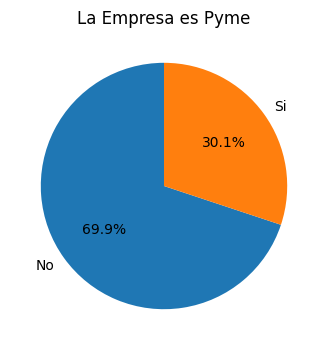

In [ ]:
pyme_counts = df['Es Pyme'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(pyme_counts, labels=pyme_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('La Empresa es Pyme')
plt.show()

De esta forma podemos concluir que el 30% de las empresas que están registradas en Armenia se encuentran clasificadas como PYME. 

Ahora vamos a otorgar una fecha de actualización del día de hoy.

In [ ]:
hoy = date.today()
df['HOY'] = hoy
df['HOY'] = pd.to_datetime(df['HOY'])

Finalmente, se creará un archivo excel con esta base de datos depurada.

In [ ]:
excel_path='C:\\Users\\danie\\OneDrive\\Escritorio\\Web Scraping API - CCE\\df ARMENIA.xlsx'
df.to_excel(excel_path,sheet_name='Armenia')